# Rot-MNIST data visualization

<b>Rot-MNIST</b> is a variant of the popular MNIST dataset where digits are rotated in-plane by arbitrary angles. The dataset can be found at https://www.dropbox.com/s/0fxwai3h84dczh0/mnist_rotation_new.zip.

This script is meant to visualize the training and test sets and provide an understanding of this dataset.

In [1]:
# Importing the necessary dependencies below
import argparse
import os
import random
import sys
import time
from urllib.request import urlopen
import zipfile
sys.path.append('../')
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random

### Loading the dataset

In [2]:
# specify below the relative path of the directory where the folder mnist_rotation_new is kept.
data_dir = '.'

In [4]:
# loading the train, val and test sets
rmnist_dir = data_dir + '/mnist_rotation_new'
train = np.load(rmnist_dir + '/rotated_train.npz')
valid = np.load(rmnist_dir + '/rotated_valid.npz')
test = np.load(rmnist_dir + '/rotated_test.npz')

## Statistics of the data

#### Samples in training, validation and test sets

In [5]:
print('No. training samples: ', train['x'].shape[0])
print('No. validation samples: ', valid['x'].shape[0])
print('No. test samples: ', test['x'].shape[0])

No. training samples:  10000
No. validation samples:  2000
No. test samples:  50000


#### Analyzing sample counts per class for the data subsets

In [6]:
print('Training set of ', train['x'].shape[0], ' samples')
#computing samples
tr_count = []
tr_frac = []
for i in range(10):
    tr_count.append((train['y']==i).sum())
    tr_frac.append(((train['y']==i).sum()/train['y'].shape[0]).round(3))
# Creating a table containing fractions of each class in the train set
from IPython.display import HTML, display
import tabulate
table = [["Class", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Total"],
         ["Samples", tr_count[0], tr_count[1], tr_count[2], tr_count[3],
          tr_count[4], tr_count[5], tr_count[6], tr_count[7], tr_count[8],
          tr_count[9], train['y'].shape[0]],
         ["Fraction", tr_frac[0], tr_frac[1], tr_frac[2], tr_frac[3],
          tr_frac[4], tr_frac[5], tr_frac[6], tr_frac[7], tr_frac[8],
          tr_frac[9], 1.0]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Training set of  10000  samples


Class,0,1,2,3,4,5,6,7,8,9,Total
Samples,984,1156,1044,1026,966,909,1001,1029,939,946,10000
Fraction,0.098,0.116,0.104,0.103,0.097,0.091,0.1,0.103,0.094,0.095,1.0


In [7]:
print('Validation set of ', valid['x'].shape[0], ' samples')
#computing samples
tr_count = []
tr_frac = []
for i in range(10):
    tr_count.append((valid['y']==i).sum())
    tr_frac.append(((valid['y']==i).sum()/valid['y'].shape[0]).round(3))
# Creating a table containing fractions of each class in the train set
from IPython.display import HTML, display
import tabulate
table = [["Class", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Total"],
         ["Samples", tr_count[0], tr_count[1], tr_count[2], tr_count[3],
          tr_count[4], tr_count[5], tr_count[6], tr_count[7], tr_count[8],
          tr_count[9], valid['y'].shape[0]],
         ["Fraction", tr_frac[0], tr_frac[1], tr_frac[2], tr_frac[3],
          tr_frac[4], tr_frac[5], tr_frac[6], tr_frac[7], tr_frac[8],
          tr_frac[9], 1.0]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Validation set of  2000  samples


Class,0,1,2,3,4,5,6,7,8,9,Total
Samples,200,223,220,189,187,179,186,210,209,197,2000
Fraction,0.1,0.112,0.11,0.094,0.094,0.09,0.093,0.105,0.104,0.098,1.0


In [8]:
print('Test set of ', test['x'].shape[0], ' samples')
#computing samples
tr_count = []
tr_frac = []
for i in range(10):
    tr_count.append((test['y']==i).sum())
    tr_frac.append(((test['y']==i).sum()/test['y'].shape[0]).round(3))
# Creating a table containing fractions of each class in the train set
from IPython.display import HTML, display
import tabulate
table = [["Class", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, "Total"],
         ["Samples", tr_count[0], tr_count[1], tr_count[2], tr_count[3],
          tr_count[4], tr_count[5], tr_count[6], tr_count[7], tr_count[8],
          tr_count[9], test['y'].shape[0]],
         ["Fraction", tr_frac[0], tr_frac[1], tr_frac[2], tr_frac[3],
          tr_frac[4], tr_frac[5], tr_frac[6], tr_frac[7], tr_frac[8],
          tr_frac[9], 1.0]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Test set of  50000  samples


Class,0,1,2,3,4,5,6,7,8,9,Total
Samples,4999,5668,4965,5108,4804,4537,4971,5221,4864,4863,50000
Fraction,0.1,0.113,0.099,0.102,0.096,0.091,0.099,0.104,0.097,0.097,1.0


From the distribution of samples between the classes, it can be seen that the data is mostly balanced across different classes with sample fraction not going below 9% for any class in dataset. SImilarly, sample fraction is around 11% max across the three subsets.

This implies that beyond the traditional cross-entropy loss, no adding class balancing methods are needed to train the model for classification task on this dataset.

## Data visualization

#### Training samples

In [10]:
# we create here a large tile with nt times nt images randomly chosen from the dataset
nt=25
train_tile = np.zeros((28*nt, 28*nt))
for i in range(nt):
    for j in range(nt):
        idx = random.randint(0, train['x'].shape[0])
        train_tile[i*28:(i+1)*28, j*28:(j+1)*28] = np.reshape(train['x'][idx,:], (28,28))

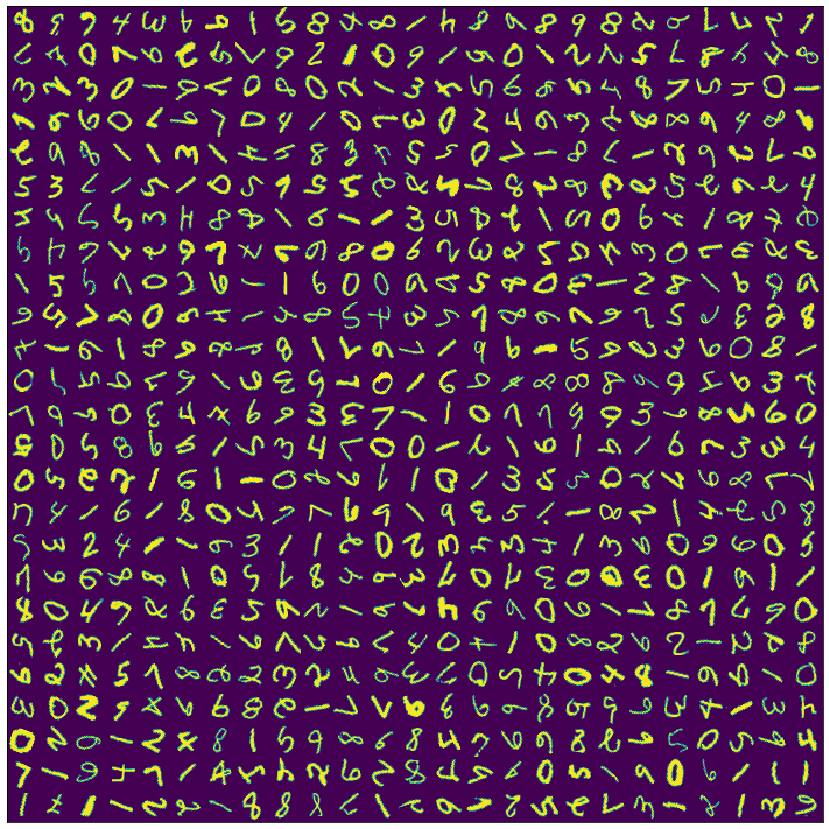

In [11]:
plt.figure(figsize = (15,15))
plt.imshow(train_tile)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

Above we see 625 samples from the training set. The dataset comprises rotated variants of the 10 MNIST digits. 

#### Test samples

In [12]:
# we create here a large tile with nt times nt images randomly chosen from the dataset
nt=25
test_tile = np.zeros((28*nt, 28*nt))
for i in range(nt):
    for j in range(nt):
        idx = random.randint(0, test['x'].shape[0])
        test_tile[i*28:(i+1)*28, j*28:(j+1)*28] = np.reshape(test['x'][idx,:], (28,28))

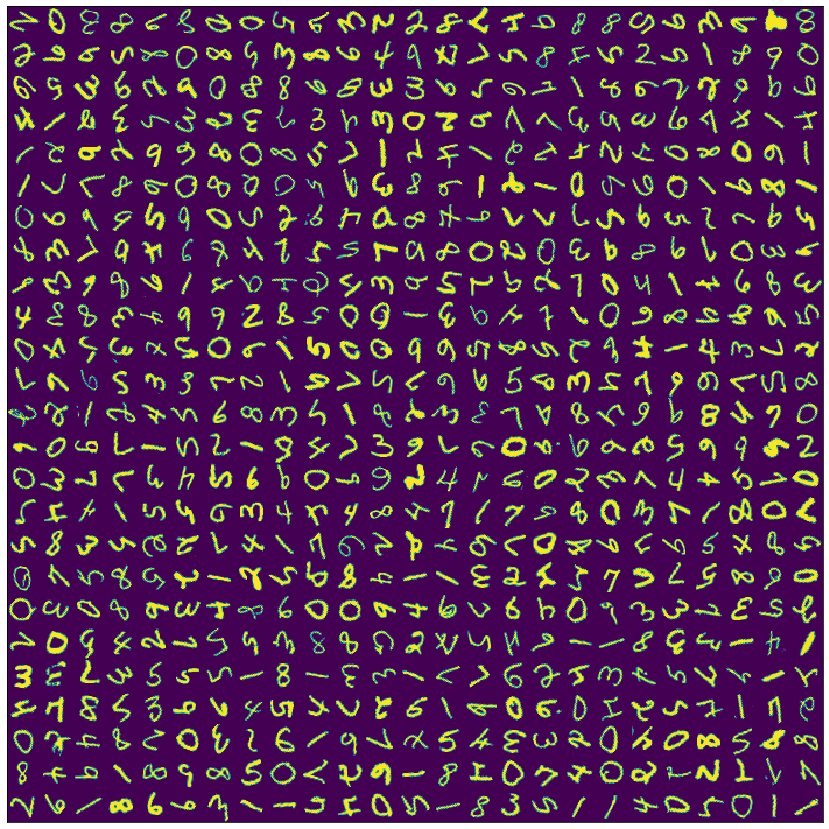

In [13]:
plt.figure(figsize = (15,15))
plt.imshow(test_tile)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

Similar to the training set, the 625 test samples shown above also comprise in-plane rotations at arbitrary angles.

### Context of the dataset

In the above dataset, the training set comprises only 10000 samples. Studies using this dataset argue that the limited rotation variations appearing in the training set are not sufficient to let the model learn all rotational variations of the samples. Moreover the overlap of the train and test sets is relatively low in the context of orientations. Thus, it is hoped that when regular CNNs are trained on the orientations present in the training set, they might not be good enough for predictions on the test set, where the rotational orientations differ.